# Задача машинного обучения

* Обучающая выборка: $X^l =  (x_i, y_i)_{i=1}^l$, объекты $x_i \in ℝ^n$, ответы $y_i$.
* Задача *регресси*: $Y ⊆ ℝ$
  
$$Q(w; X^l) = ∑_{i=1}^l (a(w, x_i) - y_i) ^2 → \min_w$$


* Задача классификации с 2-я классами: $Y = \{1, -1\}$  
  
$$Q(w; X^l) = ∑_{i=1}^l L(a(w, x_i)y_i) → \min_w$$


$a(w, x_i)$ - модель машинного обучения  
$L$ - невозрастающая функция остутпа

# Stochastic Gradient Descent (SGD)
  
* Идея метода - идти в сторону антиградиента функции потерь
* Эмпирический риск:
$$Q(w) = \sum_{i=1}^l ℒ (w, x_i) → \min_w$$

## Метод градиентного спуска
1. $w^{(0)}$ - начальное приближение
2. $w^{(t+1)} := w^{(t)} - h\nabla Q(w^{(t)})$

In [ ]:
import numpy as np  # библиотека для работы с матрицами

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm
import seaborn as sns

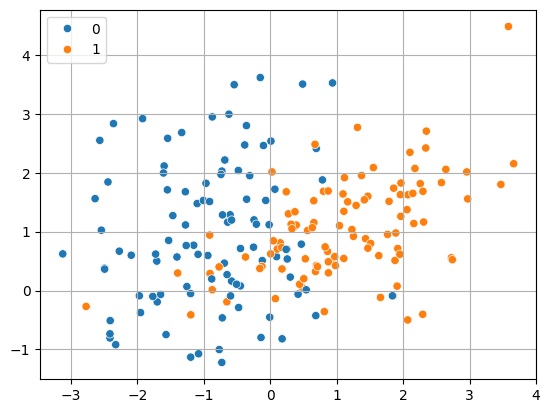

In [ ]:
# генерируем синтетический датасет для задачи классификации
X, y = make_classification(random_state=42, n_features=2, n_redundant=0, n_clusters_per_class=1, n_samples=200)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.grid()
plt.show()

In [ ]:
y.sum() # видим, что данные равномерно распределены

np.int64(100)

###  Обучим наш классификатор
**Используем логистическую функцию потерь**
$$a(w, x) = \sigma(w^Tx) = (1 + e^{-w^Tx})^{-1}$$
$$L = logloss(a, y) = -y\log a - (1-y)\log(1-a)$$
$$\frac{∂L}{∂w}=(a-y)x$$
*Шаг GD:*
$$w^{(t+1)}:=w^{(t)}-a(a-y)x$$

Стохастический градиентный спуск (Stochastic Gradient Descent - SGD) - это простой, но очень эффективный подход для обучения линейных классификаторов и регрессоров под выпуклые функции потерь, такие как (линейные) Метод опорных векторов и Логистическая регрессия.

Строго говоря, SGD - это всего лишь техника оптимизации и не соответствует определенному семейству моделей машинного обучения. Но часто экземпляр `SGDClassifier` или `SGDRegressor` будет иметь эквивалентную модель в scikit-learn API, потенциально использующий другую технику оптимизации. Например, использование `SGDClassifier(loss='log_loss')` приводит к логистической регрессии, то есть к модели, эквивалентной `LogisticRegression`, которая подгоняется с помощью SGD вместо того, чтобы подгоняться с помощью одного из других алгоритмов в LogisticRegression.

In [ ]:
sgd_classifier = SGDClassifier(loss='log_loss', penalty=None, learning_rate='constant', eta0=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sgd_classifier.fit(X_train, y_train)

print('test accuracy', sgd_classifier.score(X_test, y_test))

test accuracy 0.88


Ниже показана граница принятия решения классификатора `SGDClassifier`, эквивалентного линейной LogisticRegresion.

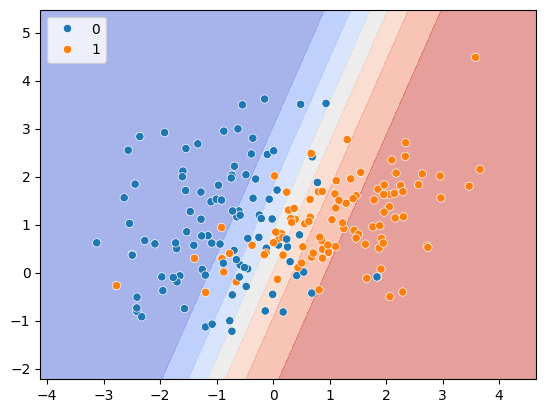

In [ ]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = sgd_classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=sns.color_palette("coolwarm", as_cmap=True), alpha=0.5)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

# Нейронные сети
## Многослойный перцептрон
*Модель перцептрона (MacCulloch, Pitts)*

$$
a(x, w) = \sigma∑_{i=1}^n (w_i x_i - w_0) = σ(w^T𝒙 - w_o)
$$

### Нейронная сеть
* Пусть $l = 1,…,L$ - номер слоя сети
* $x^0$ - вектор признаков на входе сети
* $x^l$ - вектор признаков на входе слоя $l$
* $x^L$ - выходной вектор сети
* $H_l$ - число нейронов на слое $l$
* $W^l$ - матрица весов на слое l, с размером $(H_{l-1}+1), H_l$
* $x^l = \sigma(W^l x^{l-1}) = \sigma(S^l)$


### Дифференцирование функции потерь
$$\frac{\partial ℒ(w)}{\partial w}=\frac{\partial ℒ(w)}{\partial x}\frac{\partial x}{\partial w}$$

$$\frac{\partial ℒ(w)}{\partial x^L} ≡ 𝜀^L$$  

$$\frac{\partial ℒ(w)}{\partial x^{L-1}} = \frac{\partial ℒ(w)}{\partial x^{L}} \frac{\partial x^L}{\partial x^{L-1}} = 𝜀^L \frac{\partial \sigma(W^{L} x^{L-1})}{\partial x^{L-1}} = 𝜀^L ∂\sigma(S^L) W^L= 𝜀^L z^L W^L ≡ 𝜀^{L-1}$$  

$$\frac{\partial ℒ(w)}{\partial w^l} = \frac{\partial ℒ(w)}{\partial x^l}\frac{\partial x^l}{\partial w^l} = 𝜀^{l}z^lx^{l-1}$$

Где $\frac{\partial ℒ(w)}{\partial w^l}$ -- градиент функции потерь относительно весов $w^l$, который используется при обновлении весов в процессе обратного распространения ошибки (backpropagation).

## Набор классов для построения сети


### Базовый класс

In [ ]:
import numpy as np

class Layer:
    """
    Базовый "строительный блок" нейронной сети. Каждый слой способен выполнять две основные операции:

    - Обработка входных данных для получения выхода: output = layer.forward(input)
    - Проброс градиентов через себя: grad_input = layer.backward(input, grad_output)

    Некоторые слои также содержат обучаемые параметры, которые обновляются во время backward.
    """
    def __init__(self):
        """Здесь можно инициализировать параметры слоя (если есть) и вспомогательные переменные."""
        pass

    def forward(self, input):
        """
        Принимает входные данные формы [batch, input_units], возвращает выходные данные [batch, output_units]
        """
        # Слой просто возвращает то, что получил на вход
        return input

    def backward(self, input, grad_output):
        """
        Выполняет шаг обратного распространения через слой относительно данного входа.

        Для вычисления градиентов потерь по входу используется цепное правило (backprop):
        d loss / d x = (d loss / d layer) * (d layer / d x)
        К счастью, d loss / d layer уже передается как вход, остается только умножить его на d layer / d x.

        Если слой имеет параметры (например, полносвязный слой), их также нужно обновить здесь, используя d loss / d layer
        """
        # Градиент идентичного слоя - это просто grad_output
        input_dim = input.shape[1]

        d_layer_d_input = np.eye(input_dim)

        return np.dot(grad_output, d_layer_d_input) # цепное правило


### ReLU слой
В этом слое применяется поэлементная нелинейность $f(X)=max(X,0)$.

In [ ]:
class ReLU(Layer):
    def __init__(self):
        """Слой ReLU применяет поэлементную функцию rectified linear unit ко всем входам"""
        pass

    def forward(self, input):
        """Применяет поэлементную ReLU к матрице [batch, input_units]"""
        return np.maximum(input, np.zeros(input.shape))

    def backward(self, input, grad_output):
        """Вычисляет градиент потерь по входу ReLU"""
        relu_grad_mask = input > 0
        return grad_output * relu_grad_mask

In [ ]:
relu = ReLU()
x = np.array([[-1., 0., 1.]])
relu.forward(x)

array([[0., 0., 1.]])

### Полносвязный слой

У полносвязного слоя есть обучаемые параметры: матрица линейного преобразования и столбец свободных членов.

$$f(X)= Y = W \cdot X + b $$

* X - матрица входных данных размера [batch_size, num_features],
* W - матрица преобразования размера [num_features, num_outputs]
* b - столбец свободных членов размера [num_outputs]

#### Про производные
$$f(X)= y = x \cdot W + b $$
* $y \in ℝ^{N_O}$, $x \in ℝ^{N_I}$, $W \in ℝ^{N_I × N_O}$, $b \in ℝ^{N_O}$
* $\frac{∂L}{∂y} \in ℝ^{N_O}$
* $y_1 = x_1 W_{11} + x_2 W_{21} + … + x_{N_I}W_{N_I 1} + b_1$
* $y_j = x_1 W_{1j} + x_2 W_{2j} + … + x_{N_I}W_{N_I j} + b_j$

**Задача**  
Найти $\frac{∂L}{∂b}$


In [ ]:
# Предположим следующие размерности:
batch_size = 3
input_units = 2
output_units = 4

# Инициализация случайных данных
X = np.random.randn(batch_size, input_units)  # не требует градиента
W = np.random.randn(input_units, output_units)  # требует градиента
b = np.random.randn(output_units)  # требует градиента

In [ ]:
# Прямой проход
a1 = np.dot(X, W)  # промежуточный результат [3,4]
y = a1 + b         # конечный результат [3,4]

In [ ]:
# Предположим, grad_output - градиент от L по y (получен от следующего слоя)
grad_output = np.random.randn(batch_size, output_units)

# Обратное распространение для b
grad_b = np.zeros_like(b)  # инициализация градиента для b [4]

# Вычисляем ∂L/∂b
for i in range(batch_size):
    # Для каждого примера в батче добавляем его вклад в градиент
    grad_b += grad_output[i]  # ∂y_i/∂b = 1, поэтому просто добавляем grad_output[i]

# Усредняем по батчу
grad_b /= batch_size

print("Градиент по b:", grad_b)

Градиент по b: [ 0.29209284 -0.02555136  0.40983695  0.67322214]


In [ ]:
# Что аналогично решению
grad_b = np.sum(grad_output, axis=0) / batch_size

In [ ]:
grad_b

array([ 0.29209284, -0.02555136,  0.40983695,  0.67322214])

Напишем класс слоя, в котором реализованы forward и backward проходы:

In [ ]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        """
        Полносвязный слой выполняет аффинное преобразование:
        f(x) = <W*x> + b
        """
        self.learning_rate = learning_rate

        # Инициализация весов малыми случайными числами из нормального распределения
        self.weights = np.random.randn(input_units, output_units) * 0.01
        self.biases = np.zeros(output_units)

    def forward(self, input):
        """
        Выполняет аффинное преобразование:
        f(x) = <W*x> + b

        Форма входных данных: [batch, input_units]
        Форма выходных данных: [batch, output_units]
        """
        result = np.dot(input, self.weights)
        return np.add(result, self.biases)

    def backward(self, input: np.array, grad_output):
        # Вычисляем d f / d x = d f / d dense * d dense / d x
        # где d dense/ d x = транспонированные веса
        grad_input = np.dot(grad_output, self.weights.T)

        # Вычисляем градиенты по весам и смещениям
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.sum(axis=0)

        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        # Выполняем шаг стохастического градиентного спуска
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases

        return grad_input

### Функция потерь

In [ ]:
def softmax_crossentropy_with_logits(logits,reference_answers):
    """Вычисляет кроссэнтропию из logits[batch,n_classes] и идентификаторов правильных ответов"""
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]

    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))

    return xentropy

def grad_softmax_crossentropy_with_logits(logits,reference_answers):
    """Тоже вычисляет градиент кроссэнтропии из logits[batch,n_classes] и идентификаторов правильных ответов"""
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- ones_for_answers + softmax) / logits.shape[0]

## Загрузим данные

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

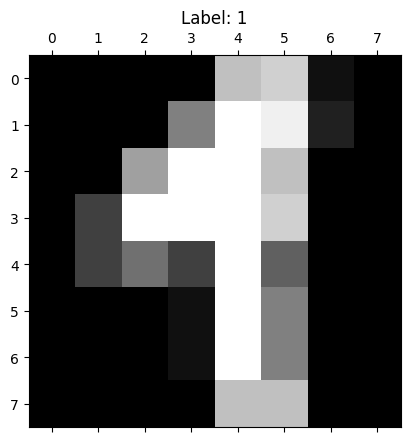

In [ ]:
X, y = load_digits(return_X_y=True)
idx = 56
plt.gray()
plt.matshow(X[idx].reshape((8, 8)))
plt.title(f"Label: {y[idx]}"%y[idx])
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

print("# Train sample:", X_train.shape)
print("# Val sample:", X_val.shape)
print("# Test sample:", X_test.shape)

# Train sample: (1257, 64)
# Val sample: (378, 64)
# Test sample: (162, 64)


## Соберем модель
В нашей реализации сеть - просто список (Python-list) слоев.

In [ ]:
np.random.seed(12)
network = []
hidden_layers_size = 40
network.append(Dense(X_train.shape[1], hidden_layers_size))
network.append(ReLU())
network.append(Dense(hidden_layers_size, hidden_layers_size))
network.append(ReLU())
network.append(Dense(hidden_layers_size, 10))

In [ ]:
def forward(network, X):
    """
    Вычисляем активации всех слоёв сети, применяя их последовательно.
    Возвращает список активаций для каждого слоя.
    Убедитесь, что последняя активация соответствует logits сети.
    """
    activations = []
    input = X

    activations.append(network[0].forward(input))
    for i in range(1, len(network)):
        activations.append(network[i].forward(activations[i - 1]))

    assert len(activations) == len(network)
    return activations

def predict(network, X):
    """
    Прогнозирует наиболее вероятный класс для каждого примера.
    """
    logits = forward(network, X)[-1]
    return logits.argmax(axis=-1)

Функция `forward` вне класса `Dense` была написана для обработки всей последовательности слоёв сети (т. е. для инференса), в то время как метод `Dense.forward` отвечает только за преобразование одного слоя.

Посмотрим выход:

In [ ]:
forward(network, X_train[: 8])[-1][0] # логиты первого примера из батча

array([-4.52638356e-05,  1.82874622e-05, -3.06136870e-05,  8.97121670e-05,
        7.17815183e-05, -2.18795305e-05, -3.59011368e-06,  5.55375867e-05,
       -2.77631392e-05, -4.38863323e-05])

In [ ]:
predict(network, X_train[: 8])[0]

np.int64(3)

<Figure size 640x480 with 0 Axes>

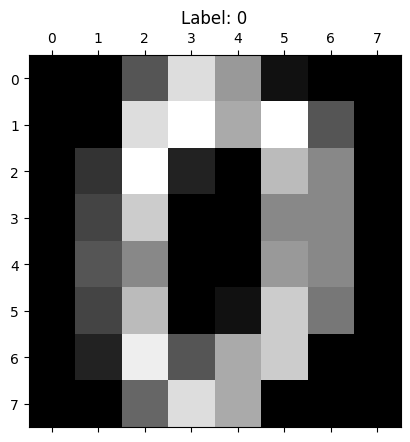

In [ ]:
plt.gray()
plt.matshow(X[0].reshape((8, 8)))
plt.title(f"Label: {y[0]}"%y[0])
plt.show()

## Обучим модель



In [ ]:
def train(network,X,y):
    """
    Обучает сеть на заданном батче X и y.
    Сначала выполняется прямой проход (forward), чтобы получить активации всех слоев.
    Затем выполняется обратный проход (backward) от последнего слоя к первому.

    После вызова backward для всех слоев, все Dense слои уже делают один шаг градиентного спуска.
    """

    # Получаем активации слоев
    layer_activations = forward(network,X)
    layer_inputs = [X] + layer_activations  # layer_inputs[i] - вход для network[i]
    logits = layer_activations[-1]

    # Вычисляем функцию потерь и начальный градиент
    loss = softmax_crossentropy_with_logits(logits,y)
    loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

    # Распространяем градиенты по слоям сети, используя .backward
    # подсказка: начинаем с последнего слоя и двигаемся к предыдущим

    for i in range(len(network) - 1, -1, -1):
        loss_grad = network[i].backward(layer_inputs[i], loss_grad)

    return np.mean(loss)

Проследим обучение:

In [ ]:
from tqdm.auto import tqdm

def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    """Генератор мини-батчей для итерации по данным обучения с возможностью перемешивания"""

    assert len(inputs) == len(targets)  # Проверка, что количество данных и меток совпадает

    if shuffle:
        indices = np.random.permutation(len(inputs))  # Случайная перестановка индексов

    # Итерация по данным с шагом batchsize с прогресс-баром:
    for start_idx in tqdm(range(0, len(inputs) - batchsize + 1, batchsize)):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]  # Выбор случайного батча
        else:
            excerpt = slice(start_idx, start_idx + batchsize)  # Выбор последовательного батча

        yield inputs[excerpt], targets[excerpt]  # Возврат текущего мини-батча

In [ ]:
from IPython.display import clear_output
train_log = []
val_log = []

Epoch 14
Train accuracy: 1.0
Val accuracy: 0.9761904761904762


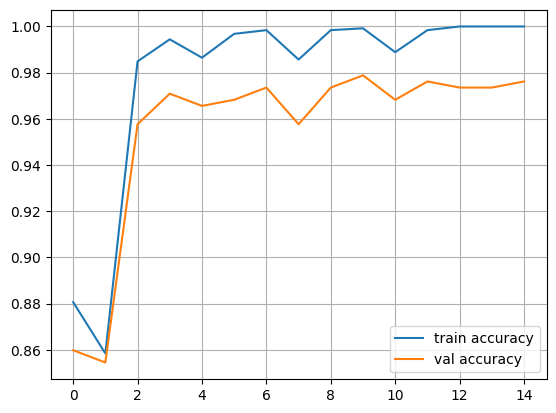

In [ ]:
for epoch in range(15):

    for x_batch,y_batch in iterate_minibatches(X_train, y_train, batchsize=32, shuffle=True):
        train(network, x_batch, y_batch)

    train_log.append(np.mean(predict(network, X_train) == y_train))
    val_log.append(np.mean(predict(network, X_val) == y_val))

    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Токенизация

### One-hot encoding

Самый просто и примитивный метод, результатом которого является матрица с единицами и нулями внутри. 1 говорит о том, что какой-то текстовый элемент встречается в предложении (или документе). 0 говорит о том, что элемент не встречается в предложении.

Например, в Word2Vec сначала берутся именно one-hot вектора, а уже дальнейшие преобразования делают их более контекстоориентированными.

Есть и другие методы векторизации. Один из популярных -- BPE, который используется во многих моделях трансформеров, включая GPT, GPT-2, RoBERTa, BART и DeBERTa.

### Byte Pair Encoding (BPE)

Идея похожа на [коды Хафмана](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%B4_%D0%A5%D0%B0%D1%84%D1%84%D0%BC%D0%B0%D0%BD%D0%B0), собственно сам термин пошёл из работы по кодированию.

Мотивация:
1. Многие языки являются синтетическими, где изменение смысла слова происходит с помощью добавления приставок и суффиксов (например, русский, немецкий, турецкий), а не через предлоги, как в аналитическом языке (например, английском)
> *Морфология, морфема, экзоморф, полиморфизм, морфизм* - везде есть часть "морф", несущая определенную семантику.  
> Но могут быть и странные примеры: *морфий, морфин, Морфей*.  
> Хотя, конечно, этимология у этих слов одна

2. Сложно добавить все слова в словарь, поэтому может возникнуть проблема Out of vocabulary (OOV).
> Например в словаре есть "sub" и "task", но нет слова "subtask". Нам бы хотелось векторизовать и его тоже

In [ ]:
# Обучение:
# Слово - последовательность токенов
# Словарь - все токены. На нулевой итерации в словаре только символы

# В цикле:
# Назначаем новым токеном объединение двух существующих токенов,
# которое встречается чаще других пар в корпусе (имеется в виду: встречаются вместе).

# Когда нам покажется, что словарь достаточно большой (ну или частоты очень маленькие), мы остановимся.

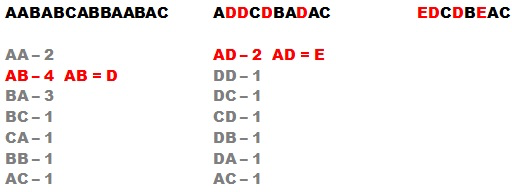

In [ ]:
data = """
Структура и композиция лонгрида

Хотя лонгрид как жанр еще только складывается, многие аспекты работы над материалами данного типа разобраны как в российской, так и в зарубежной учебно-методической литературе. Например, М. Григорян выделяет в качестве отдельного жанра «длинные статьи» объемом в 800−2000 слов. Темой для таких материалов может стать «анализ ситуации, рассказ о необычном человеке и повествование о том, как живут люди в странных местах». При подготовке материала М. Григорян рекомендует использовать композиционную схему «зигзаг», чередуя примеры и репортажные фрагменты («краски») с информационными вставками («факты»). Начинать текст следует с человеческой истории, отражающей проблему, завершать материал – другой историей, которая «оставила бы у читателя запоминающийся образ»13.

Аналогичный подход предлагает О.Р. Самарцев, который противопоставляет новостным текстам, где информация подается в порядке убывания важности (композиционная схема «перевернутая пирамида»), историйные тексты, представляющие собой исследование ситуации в какой-то сфере и выстраиваемые как последовательность историй, соединенных авторскими связками. В качестве композиционных схем подобных материалов упомянуты «параллельный рассказ», когда «истории связаны между собой только на уровне темы», «лейтмотивный рассказ», когда «истории объединены сквозной историей и пересекаются с ней в ключевых точках», и «перекрестный рассказ», когда «истории пересекаются как в отдельных точках, так и по всему тексту». Также одним из приемов названо «закольцовывание», когда «начавшаяся в первом абзаце материала история завершается в последнем абзаце, охватывая другие истории своеобразным сюжетным кольцом»14.

Близкий к лонгриду жанр описан А.В. Колесниченко под названием «трендовая статья»15. Предметом отображения здесь является значимое изменение, происходящее в обществе, новое явление, тенденция. Например, то, что благодаря распространению цифровой фототехники фотографы-любители начали конкурировать с профессиональными папарацци, продавая в СМИ фотографии «звезд», случайно встреченных в различных местах16. Метод отображения – уже упомянутая выше композиционная схема «зигзаг», когда материал подается в виде чередования примеров, иллюстрирующих тренд, и обобщений, раскрывающих значение этих примеров и вписывающих их в контекст. Целью является доказательство того, что данный тренд действительно имеет место, а также новое, более глубокое понимание происходящего и его возможных последствий.

Среди англоязычных источников следует прежде всего отметить М. Менчер, который выделяет такой жанр, как «длинная история» (long story) либо глубокая история (deep story)17. В качестве характерных особенностей текстов данного жанра указан как большой объем, так и наличие такой информации, которая в текстах кратких жанров обычно отсутствует. Сбор материала предполагает «погружение в тему, а не просто поверхностный взгляд». Строится же текст следующим образом. Вначале идет пример, иллюстрирующий тему, затем указывается значимость явления (significance paragraph). Так, текст про рост насилия в школах начинается с примера, когда в драке в школьном туалете был убит учащийся; затем приводится статистика о росте частоты драк в школах в 2,5 раза за пять лет и мнение эксперта, изучавшего ситуацию с насилием в школах и пришедшего к выводу, что из-за сложившейся ситуации многие школы в принципе не способны дать образование. Затем идут другие примеры, объяснение действий персонажей, экспертные пояснения и контекст, а завершает материал так называемый kicker (ударная концовка) – информация, призванная перевернуть сложившееся впечатление и показать происходящее в новом свете.

Еще один близкий к лонгриду жанр описан в англоязычной литературе под названием feature (характерная черта). Б.Р. Паттерсон относит к этому жанру большие тексты, написанные после «глубокого погружения в тему» (deep reporting). Состоят такие тексты из элементов четырех видов: повествования (англ. narrative – «действия», «движения», «сцены»), описания (англ. description – «показ деталей обстановки»), реалистичного диалога (англ. realistic dialogue – «разговоры персонажей между собой») и объяснения (англ. exposition – «обстоятельства», «предыстория», «причины», «процедуры»)18. Автор отмечает, что среди этих четырех элементов объяснение воспринимается читателем тяжелее всего, и поэтому элементы этого типа надо минимизировать и изложить максимально просто. Упор же следует делать на репортажных фрагментах с действиями и диалогами персонажей и на историях-примерах.

В качестве композиционных схем подачи материала Б.Р. Паттерсон предлагает такие варианты: повествование с чередованием объяснения, последовательный показ происходящего с разных сторон либо набор примеров, которые представлены читателю один за другим. Начинать текст рекомендуется с примера, затем идет обоснование значимости темы (justifier). Типовые варианты концовок: закольцовывание (отсыл к истории в начале текста), обобщение, обращение в будущее и пример, еще раз показывающий, что автор имел в виду.

Исходя из вышесказанного можно сформулировать направления работы над лонгридом в плане сбора и подачи информации. Структурные элементы лонгрида – это истории и репортажные фрагменты, иллюстрирующие описываемое явление, и объясняющая информация, которая вписывает примеры в контекст, показывает их распространенность и уточняет их значение. Композиция – это различные виды сочетания примеров и объяснений в зависимости от характера темы и собранной журналистом информации.



Распространенность и особенности лонгридов в российских изданиях

Чтобы исследовать ситуацию с лонгридами в современных российских изданиях, был проведен мониторинг изданий, а также контент-анализ части найденных лонгридов. Целью мониторинга было выявление распространенности лонгридов в изданиях различных типов, целью контент-анализа − выявление содержательных и композиционных особенностей лонгридов, их соответствие заявленным выше жанровым характеристикам.

В качестве объектов для мониторинга были взяты выпуски печатных изданий и сайты интернет-изданий, главным образом федеральных и московских. Всего было исследовано более 20 печатных и интернет-изданий. Мониторинг проводился в порядке зондирования, и его результаты не претендуют на репрезентативность. Задачей мониторинга было зафиксировать наличие лонгридов в российских изданиях, а также определить типы изданий, в большей мере склонных к публикациям материалов этого жанра.

Результаты мониторинга показали, что лонгриды в российских СМИ присутствуют, причем публикуются такие материалы в изданиях, различных по виду и профилю: и в ежедневных газетах, и в еженедельных журналах, и в онлайн-изданиях, причем как общего интереса, так и развлекательных. При этом следует отметить, что наличие лонгридов с видом издания напрямую не связано. Так, что касается еженедельных журналов общего интереса, то лонгриды регулярно встречаются в «Русском репортере» и в издании «Коммерсантъ. Власть» и полностью отсутствуют в выпусках за 2014 г. в изданиях «Коммерсантъ. Деньги» и «Огонек». Что касается ежедневных газет, то лонгриды присутствуют в небольшой части изданий, концепция которых предусматривает помимо новостей и ежедневной аналитики публикации более сложных и глубоких материалов. В интернет-изданиях, публикующих помимо перепечаток собственные материалы, лонгриды присутствуют при наличии у издания корреспондентов, способных длительное время разрабатывать тему и имеющих соответствующий уровень мастерства для подготовки лонгрида.

По итогам мониторинга для контент-анализа были отобраны десять лонгридов, опубликованных в 2011−2014 гг. в десяти изданиях: в ежедневных газетах («Новые известия», «Ведомости», РБК), в еженедельных журналах («Русский репортер», «Коммерсантъ. Власть»), на сайте ежемесячного журнала (Forbes.ru) и на сайтах онлайн-изданий (Lenta.ru, The-village.ru, Zona.media, Lookatme.ru). Такой спектр изданий выбран для того, чтобы максимально широко показать разнообразие лонгридов, публикуемых в российских СМИ, а также особенности лонгридов применительно к типу СМИ, в котором они выходят.
"""

In [ ]:
tokens = [x for x in data]
tokens = list(set(tokens))
print(tokens)

['o', 'э', '»', 'т', 'Ч', ',', 'а', 'О', 'С', 'б', 'Г', '6', '4', ' ', 'и', 'ы', 'п', '1', 'у', 'v', 'ф', 'к', 'М', 'ш', 'g', 'Д', '5', 'й', 'c', 'L', 'я', 'В', 'Х', 'о', 'm', 'e', 'Ц', 'ъ', 'k', 'i', 'ж', 'н', 'А', ':', 't', 'Н', 'щ', 'x', 'Р', 'з', 'ц', 'F', '2', 'К', '(', 'в', 's', 'b', '-', 'д', 'Е', '0', 'u', 'l', '.', 'З', 'T', 'Б', '\n', 'n', 'd', 'f', 'г', 'е', '8', 'p', 'a', 'У', 'Т', '7', 'ь', 'р', 'с', 'м', 'y', ';', 'ч', 'х', 'Z', '–', 'л', 'j', 'r', '3', ')', '«', '−', 'И', 'П', 'ю', 'h']


In [ ]:
# для удобства визуализации будем заменять токены в BPE
# китайскими иероглифами
chars = ['的', '一', '是', '不', '了', '在', '人', '有', '我', '他', '这', '个',
         '们', '中', '来', '上', '大', '为', '和', '国', '地', '到', '以', '说',
         '时', '要', '就', '出', '会', '可', '也', '你', '对', '生', '能', '而',
         '子', '那', '得', '于', '着', '下', '自', '之', '年', '过', '发', '后',
         '作', '里', '用', '道', '行', '所', '然', '家', '种', '事', '成', '方',
         '多', '经', '么', '去', '法', '学', '如', '都', '同', '现', '当', '没',
         '动', '面', '起', '看', '定', '天', '分', '还', '进', '好', '小', '部',
         '其', '些', '主', '样', '理', '心', '她', '本', '前', '开', '但', '因',
         '只', '从', '想', '实', '日', '军', '者', '意', '无', '力', '它', '与',
         '长', '把', '机', '十', '民', '第', '公', '此', '已', '工', '使', '情',
         '明', '性', '知', '全', '三', '又', '关', '点', '正', '业', '外', '将',
         '两', '高', '间', '由', '问', '很', '最', '重', '并', '物', '手', '应',
         '战', '向', '头', '文', '体', '政', '美', '相', '见', '被', '利', '什',
         '二', '等', '产', '或', '新', '己', '制', '身', '果', '加', '西', '斯',
         '月', '话', '合', '回', '特', '代', '内', '信', '表', '化', '老', '给',
         '世', '位', '次', '度', '门', '任', '常', '先', '海', '通', '教', '儿',
         '原', '东', '声', '提', '立', '及', '比', '员'
        ]

In [ ]:
def string_to_bow(input_string):
  word_to_ix = {}
  for word in input_string:
    if word not in word_to_ix:
      word_to_ix[word] = 1
    else:
      word_to_ix[word] += 1
  return word_to_ix

In [ ]:
N = 2

dictionary = {token:v for v, token in enumerate(tokens)}

tokenized_data = data

# здесь идет замена 20 токенов
# вы можете посмотреть, как будет работать токенизатор при большом числе итераций
for _, c in zip(range(30), chars):
  # получаем биграммы
  bigrams = [tokenized_data[i - 2] + tokenized_data[i - 1] for i in range(N, len(tokenized_data))]
  # формируем bag of words
  bow_tokens = string_to_bow(bigrams)
  # получаем токен с максимальной частотой
  key_token = max(bow_tokens, key=bow_tokens.get)
  print(key_token)

  # заменяем токен
  tokenized_data = tokenized_data.replace(key_token, c)
  # добавляем его в словарь
  dictionary[key_token] = len(dictionary) + 1

ст
 и
 п
ри
 в
ан
, 
ов
те
ен
ра
е 
он
то
ны
ет
на
 с
ре
. 
ко
ка
об
了 
х 
но
ли
я 
在и
ль


In [ ]:
sorted(dictionary.items(), key=lambda item: item[1], reverse=True)[:10]

[('ль', 131),
 ('在и', 130),
 ('я ', 129),
 ('ли', 128),
 ('но', 127),
 ('х ', 126),
 ('了 ', 125),
 ('об', 124),
 ('ка', 123),
 ('ко', 122)]

In [ ]:
tokenized_data

'\nСтрукту这一 地мпозици出л们г不да\n\nХот出л们г不д 到к ж在р ещ个中可地为кладыва上ся人м要ги个аспекты 这боты 大д ма我不алами д在要го типа 这з以р在ы 到к说российс地й人так一说зарубеж要й учеб要-ме中дичес地й 就我这ту和国Нап不мер人М国Г不горян了ыделя上说到че的в个отде可要го ж在这 «д就н来个的атьи» 以ъемом说800−2000为л有国Темой дл出таки时ма我不ал有 мож上 的ать «在а就з为итуации人这сс到з о не以ыч要м чел有еке一是有е的в有会个о 中м人到к живут люди说的р在来时ме的ах»国П不是одгот有к个ма我不ала М国Г不горян 和地м他ду上一спо可з有ать 地мпозици们ную为хему «зигзаг»人че和дуя是不меры一 和портаж来个ф这гм他ты («к这ски»)为一нформаци们来ми了的ав到ми («факты»)国Начи大ть 我к的为леду上为 чел有ечес地й一的о不и人от这жающей是р以лему人завершать ма我不ал – другой一的о不ей人地中这出«о的авила бы у чита我л出запоми大ющийс出以这з»13.\n\nА大логич来й是одход是和длага上 О.Р国Самарцев人地中рый是ротивопо的авля上 н有о的来м 我к的ам人где一нформация是ода上ся了是орядк个убыв会я了аж要的и (地мпозици们大я为хема «пе和вернутая是и这мида»),一的о不й来个我к的ы,是和д的авляющи个с以ой一сслед有会个ситуации说到地й-中为фе和一了ы的这иваемы个到к是ослед有а我可要的ь一的о不й人соедин他来时ав中рскими为вяз到ми国В 到че的в个地мпозици们来х为хем是од以来时ма我不ал有 упомянуты «па这лле可来й 这сс到з»人地гда «и的о不и为вяз在ы между为以ой 中可地 大 ур

Еще один пример токенизации можете посмотреть [здесь](https://web.stanford.edu/~jurafsky/slp3/2.pdf) в разделе 2.4.3 Byte-Pair Encoding for Tokenization

# Word2Vec (2013)

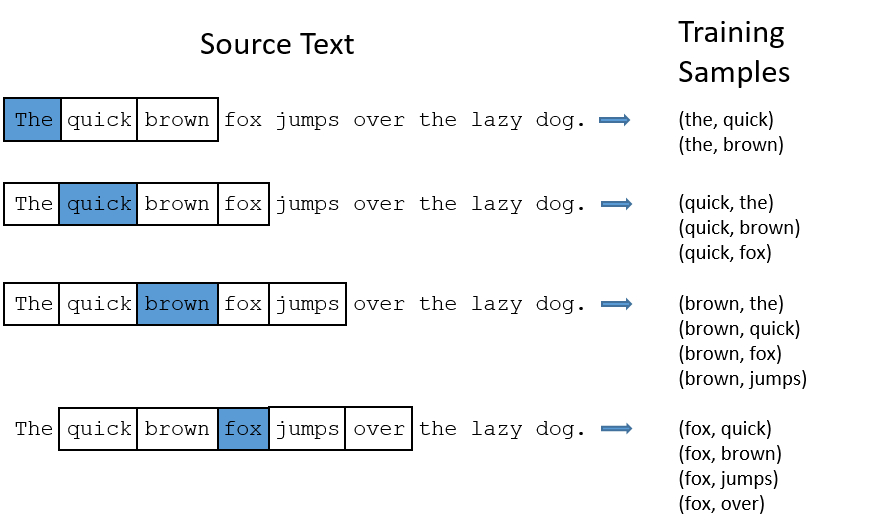

$$\newcommand{\mathleft}{\@fleqntrue\@mathmargin0pt}
{
    y_{in} = OHE\left( \text{"fox"} \right), \quad a \in  E_2^V \quad V = \text{vocab_size} \\
    y_{hidden} = y_{in}U, \quad U \in R^{V \times H} \quad H = \text{hidden_size}  \\
    y_{out} = y_{hidden}W, \quad W \in R^{H \times V} \\
}$$

Где

$U$ — матрица входных весов (размер $V × H$), где H — размерность скрытого слоя. Умножение one-hot вектора на матрицу U просто выбирает строку матрицы, соответствующую слову "fox".

$W$ — матрица выходных весов (размер $H × V$). Умножение y_hidden на W даёт логиты для каждого слова в словаре.

$W^i$ -- i-ый столбец матрицы W.

$$\newcommand{\mathleft}{\@fleqntrue\@mathmargin0pt}
{
    s = SoftMax\left( y_{out} \right) = \left( σ^i\left( y_{out} \right) \right) = \frac{\exp \left( y^i_{out} \right)}{\sum_{j=1}^{|V|} \exp \left( y^j_{out} \right)} = \frac{\exp \left( \left< y_{hidden}, W^i \right> \right)}{\sum_{j=1}^{|V|} \exp \left( \left< y_{hidden}, W^j \right> \right)} = p\!\left(W^j | y_{hidden}\right)\\
    \\
    DR\left( \text{'fox'} \right) = U\!\left( \text{'fox'} \right) + W\!\left( \text{'fox'} \right) \quad \text{-- Distributed Representation}
}$$

В оригинальном Word2Vec (Mikolov et al.) финальный embedding слова — это сумма его входного (U) и выходного (W) векторов.

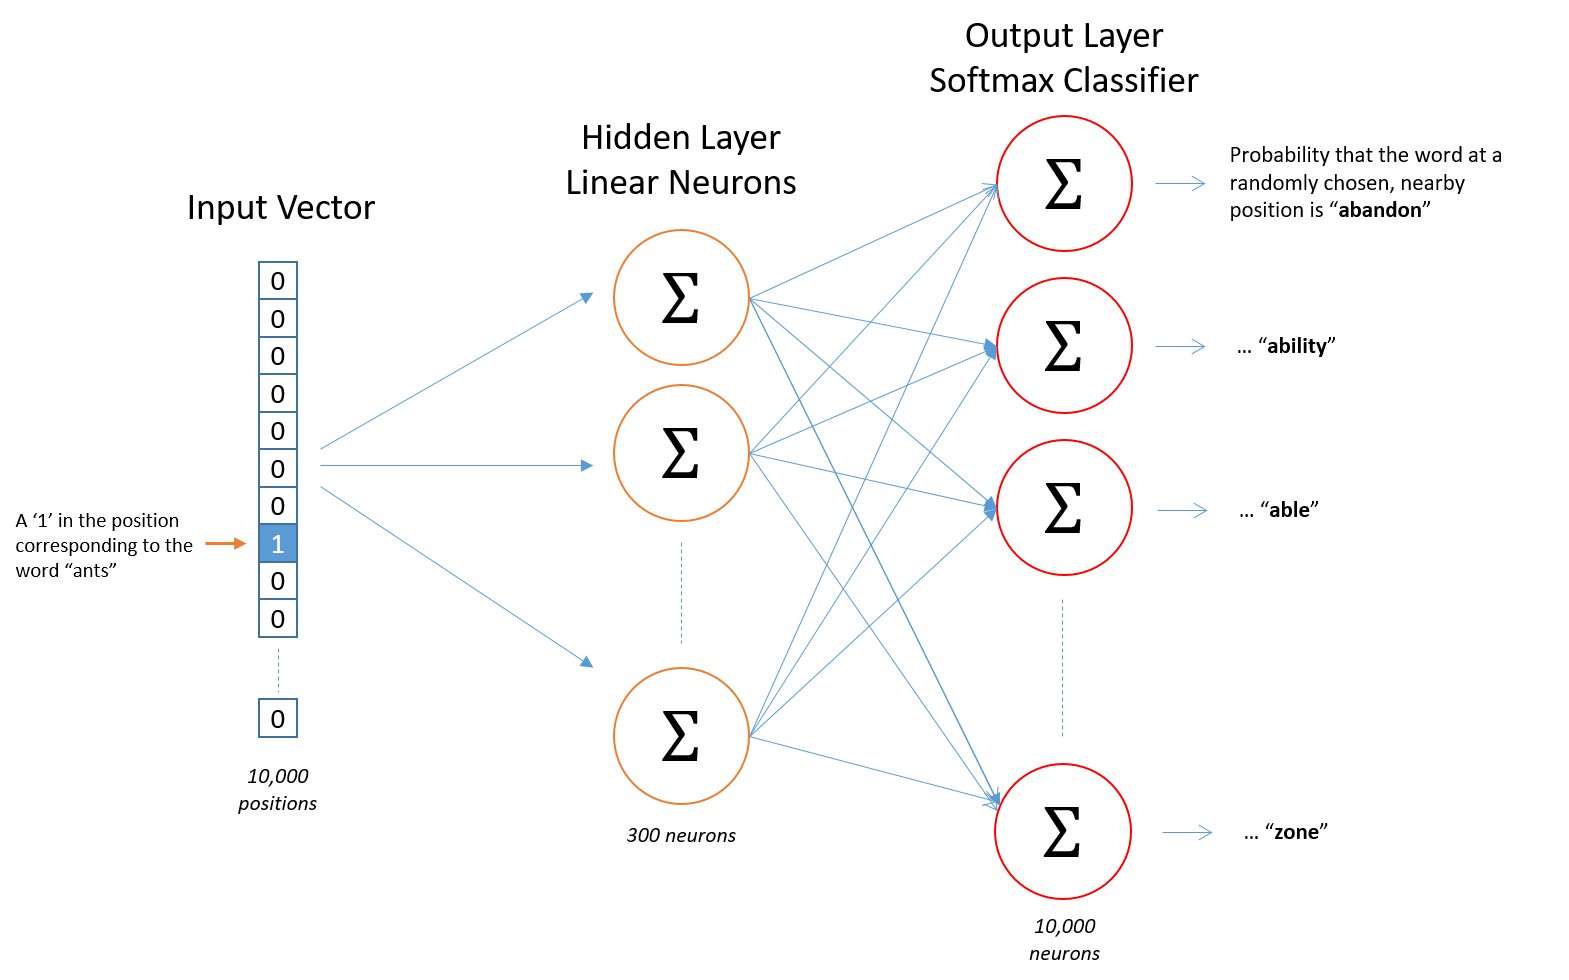

## Skip-gram & Continuous Bag-of-Words

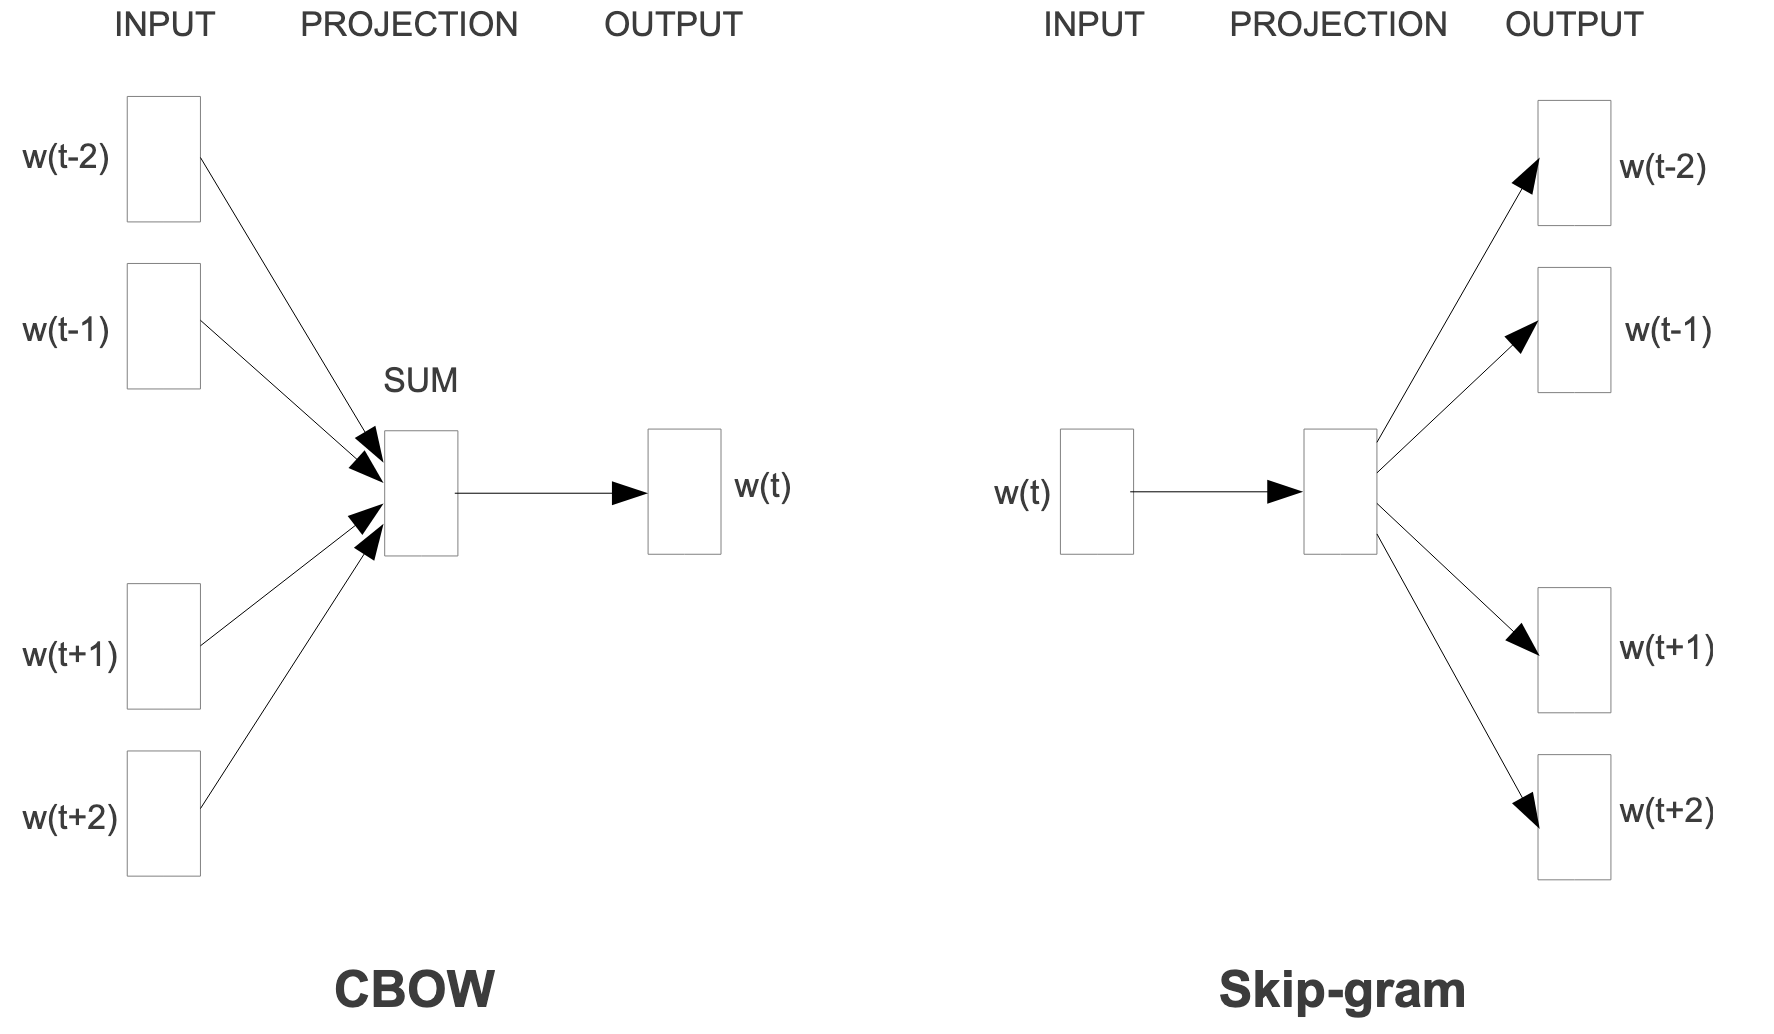

## Negative sampling
Решаем проблему большого словаря (фактически, большой размерности матрицы W)


$$\newcommand{\mathleft}{\@fleqntrue\@mathmargin0pt}
{
    u_{inp} - \text{Строка м-цы $U$ соответствующая входному слову} \\
    w_{out} - \text{Столбец м-цы $W$ соответствующий выходному слову}  \\
    \sigma \! \left( x \right) = \frac{1}{1 + \exp{\! \left( -x \right) }} \\
    p\!\left( 1 | \, inp, out \right) = \sigma \! \left( \left< u_{inp}, w_{out} \right>  \right) \\
    p\!\left( 0 | \, inp, out \right) = 1 - \sigma \! \left( \left< u_{inp}, w_{out} \right>  \right) \\
    L = -\log p\!\left( 1 | \, inp, out \right) - \sum_{𝑈\left(ω\right)^{3/4}}\log p\!\left( 0 | \, inp, out \right)
}$$


В методе negative sampling Word2Vec мы оптимизируем следующую целевую функцию:

$$
J = \log \sigma(u_{inp}^T w_{out}) + \sum_{i=1}^k \mathbb{E}_{w_i \sim P_n(w)}[\log \sigma(-u_{inp}^T w_i)]
$$

где:
- $\sigma$ - сигмоидная функция: $\sigma(x) = \frac{1}{1 + e^{-x}}$
- $P_n(w)$ - распределение шума для negative sampling
- $k$ - количество негативных примеров на каждый позитивный

**Распределение шума $P_n(w)$**

Распределение шума вычисляется как:

$$
P_n(w) = \frac{U(w)^{\frac{3}{4}}}{Z}
$$

где:
- $U(w)$ - униграммная частота слова $w$ в корпусе
- $Z = \sum_{w} U(w)^{\frac{3}{4}}$ - нормировочная константа
- Степень $\frac{3}{4}$ была подобрана эмпирически для наилучших результатов


Такая модификация:
1. Уменьшает доминирование частых слов (типа "the", "a")
2. Улучшает представление редких слов
3. Создает более сглаженное распределение по сравнению с исходными частотами


## Distributed representation

$$ DR(\text{Paris}) - DR(\text{France}) + DR(\text{Russia}) = DR(\text{Moscow})$$

# Практика

In [ ]:
!pip install -U datasets huggingface_hub -qq

In [ ]:
!python -m spacy download ru_core_news_sm -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 79.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from typing import List, Tuple

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import spacy
from datasets import load_dataset

In [ ]:
from itertools import chain

In [ ]:
from tqdm.notebook import tqdm

## Загрузим Word2Vec

In [ ]:
! pip install gensim wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=2b0c7d5e401c98f4aeda5676c4460dddcc375aaf34eec47fa298b59f36a7a0fb
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
import gensim
import logging
import wget
import sys
import zipfile

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Зоопарк моделей: https://rusvectores.org/ru/models/

In [ ]:
model_url = 'http://vectors.nlpl.eu/repository/20/180.zip'
# Download the model zip file
zip_filename = wget.download(model_url)

# Extract the 'model.bin' file from the zip archive
with zipfile.ZipFile(zip_filename, 'r') as archive:
    archive.extract('model.bin')

# Load the model using the extracted file
model = gensim.models.KeyedVectors.load_word2vec_format('model.bin', binary=True)

In [ ]:
model.most_similar(positive=['средиземный_ADJ'], topn=10)

[('адриатический_ADJ', 0.6894420385360718),
 ('эгейский_ADJ', 0.6593673825263977),
 ('атлантический_ADJ', 0.5654247403144836),
 ('сицилия_PROPN', 0.5643357634544373),
 ('адриатическ_ADJ', 0.5388270616531372),
 ('каспийский_ADJ', 0.5372124314308167),
 ('проливо_NOUN', 0.5358991026878357),
 ('гибралтар_PROPN', 0.5358791947364807),
 ('балтийский_PROPN', 0.5301970839500427),
 ('побережье_NOUN', 0.5297253131866455)]

## Загрузим данные

In [ ]:
def load_sib200_ru() -> Tuple[Tuple[List[str], List[int]], Tuple[List[str], List[int]], Tuple[List[str], List[int]], List[str]]:
    trainset = load_dataset('Davlan/sib200', 'rus_Cyrl', split='train')
    X_train = trainset['text']
    y_train = trainset['category']
    valset = load_dataset('Davlan/sib200', 'rus_Cyrl', split='validation')
    X_val = valset['text']
    y_val = valset['category']
    testset = load_dataset('Davlan/sib200', 'rus_Cyrl', split='test')
    X_test = testset['text']
    y_test = testset['category']
    categories = set(y_train)
    unknown_categories = set(y_val) - categories
    if len(unknown_categories) > 0:
        err_msg = f'The categories {unknown_categories} are represented in the validation set, but they are not represented in the training set.'
        raise RuntimeError(err_msg)
    unknown_categories = set(y_test) - categories
    if len(unknown_categories) > 0:
        err_msg = f'The categories {unknown_categories} are represented in the test set, but they are not represented in the training set.'
        raise RuntimeError(err_msg)
    categories = sorted(list(categories))
    y_train = [categories.index(it) for it in y_train]
    y_val = [categories.index(it) for it in y_val]
    y_test = [categories.index(it) for it in y_test]
    return (X_train, y_train), (X_val, y_val), (X_test, y_test), categories

In [ ]:
train_data, val_data, test_data, classes_list = load_sib200_ru()

In [ ]:
print(f'Categories: {classes_list}')

Categories: ['entertainment', 'geography', 'health', 'politics', 'science/technology', 'sports', 'travel']


In [ ]:
def normalize_text(s: str, nlp_pipeline: spacy.Language) -> str:
    doc = nlp_pipeline(s)
    lemmas = [
        ('<NUM>' if token.like_num
         else token.lemma_.lower() + '_' + token.pos_)
        for token in filter(lambda it1: not it1.is_punct and not it1.like_num, doc)
    ]
    return lemmas

## Предвраительная обработка текстов

In [ ]:
nlp = spacy.load('ru_core_news_sm')

In [ ]:
print(normalize_text(train_data[0][0], nlp))

['турция_PROPN', 'с_ADP', 'сторона_NOUN', 'окружить_VERB', 'морями_NOUN', 'на_ADP', 'запад_NOUN', 'эгейским_ADJ', 'на_ADP', 'север_NOUN', 'чёрный_PROPN', 'и_CCONJ', 'на_ADP', 'юг_NOUN', 'средиземный_ADJ']


In [ ]:
train_data_norm = []
for sent in tqdm(train_data[0]):
    sent_norm = normalize_text(sent, nlp)
    sent_norm = [w for w in sent_norm if w in model.key_to_index]
    train_data_norm.append(sent_norm)
val_data_norm = []
for sent in tqdm(val_data[0]):
    sent_norm = normalize_text(sent, nlp)
    sent_norm = [w for w in sent_norm if w in model.key_to_index]
    val_data_norm.append(sent_norm)
test_data_norm = []
for sent in tqdm(test_data[0]):
    sent_norm = normalize_text(sent, nlp)
    sent_norm = [w for w in sent_norm if w in model.key_to_index]
    test_data_norm.append(sent_norm)

  0%|          | 0/701 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

In [ ]:
train_data_norm[:2]

[['турция_PROPN',
  'сторона_NOUN',
  'окружить_VERB',
  'запад_NOUN',
  'север_NOUN',
  'юг_NOUN',
  'средиземный_ADJ'],
 ['начало_NOUN',
  'война_NOUN',
  'основный_ADJ',
  'передвигаться_VERB',
  'поверхность_NOUN',
  'море_NOUN',
  'радар_NOUN',
  'начать_VERB',
  'совершенствоваться_VERB',
  'становиться_VERB',
  'более_ADV',
  'точный_ADJ',
  'подводный_ADJ',
  'прийтись_VERB',
  'уйти_VERB',
  'вода_NOUN',
  'мочь_VERB',
  'обнаружить_VERB']]

## Посчитаем обратные частоты слов

In [ ]:
word_freq = dict()
for sent in train_data_norm:
    for word in sent:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

word_freq = pd.Series(word_freq, name='n').to_frame()
word_freq['freq'] = word_freq['n'] / len(word_freq)
word_freq['side_freq'] = (1 - np.log(word_freq['freq'])) / (1 - np.log(word_freq['freq'])).max()
word_freq = word_freq.sort_values('n')
word_freq

,n,freq,side_freq
бренд_NOUN,1,0.000285,1.000000
симпсон_PROPN,1,0.000285,1.000000
ослабнуть_VERB,1,0.000285,1.000000
тропический_ADJ,1,0.000285,1.000000
окончательно_ADV,1,0.000285,1.000000
...,...,...,...
место_NOUN,44,0.012550,0.586979
человек_NOUN,44,0.012550,0.586979
также_ADV,48,0.013691,0.577483
год_NOUN,72,0.020536,0.533229


In [ ]:
weighter = word_freq['side_freq'].to_dict()
weighter.get('год_NOUN')

0.5332287421642914

In [ ]:
weighter.get('neon', 1.0)

1.0

In [ ]:
train_data_wnorm = []
for sent in tqdm(train_data_norm):
    wsent = [weighter.get(w, 1.0) for w in sent]
    train_data_wnorm.append((sent, wsent))

val_data_wnorm = []
for sent in tqdm(val_data_norm):
    wsent = [weighter.get(w, 1.0) for w in sent]
    val_data_wnorm.append((sent, wsent))

test_data_wnorm = []
for sent in tqdm(test_data_norm):
    wsent = [weighter.get(w, 1.0) for w in sent]
    test_data_wnorm.append((sent, wsent))

  0%|          | 0/701 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

In [ ]:
train_data_wnorm[3]

(['впрочем_ADV',
  'зима_NOUN',
  'красота_NOUN',
  'шарм_NOUN',
  'горный_ADJ',
  'где_ADV',
  'выпадать_VERB',
  'много_ADV',
  'снег_NOUN',
  'доступный_ADJ',
  'занятие_NOUN',
  'катание_NOUN',
  'горный_ADJ',
  'лыжа_NOUN',
  'сноуборд_NOUN'],
 [0.9243473368433824,
  0.8486946736867648,
  0.9243473368433824,
  1.0,
  0.8044407026604544,
  0.6363107974072684,
  1.0,
  0.8044407026604544,
  0.880093365817072,
  0.9243473368433824,
  0.880093365817072,
  0.8243399559635995,
  0.8044407026604544,
  0.8044407026604544,
  1.0])

In [ ]:
assert len(train_data_wnorm) == len(train_data[0])
assert len(val_data_wnorm) == len(val_data[0])
assert len(test_data_wnorm) == len(test_data[0])

## To Distributes space

In [ ]:
model.get_mean_vector(train_data_wnorm[3][0]).shape

(300,)

In [ ]:
model.get_mean_vector(train_data_wnorm[3][0]).mean()

-0.0018085877

In [ ]:
model.get_mean_vector(train_data_wnorm[3][0], train_data_wnorm[3][1]).mean()

-0.0016943538

In [ ]:
X_train = np.array([model.get_mean_vector(sent[0], sent[1]) for sent in train_data_wnorm])
y_train = np.array(train_data[1])

X_val = np.array([model.get_mean_vector(sent[0], sent[1]) for sent in val_data_wnorm])
y_val = np.array(val_data[1])

X_test = np.array([model.get_mean_vector(sent[0], sent[1]) for sent in test_data_wnorm])
y_test = np.array(test_data[1])

In [ ]:
X_train.shape

(701, 300)

## Train classifier

In [ ]:
classifier = Pipeline(steps=[
    ('cls', LogisticRegression(solver='saga', max_iter=200, random_state=42))
])

In [ ]:
cv = GridSearchCV(
    estimator=classifier,
    param_grid={
        'cls__C': [1e-1, 1, 10, 100, 1000],
        'cls__penalty': ['l1', 'l2']
    },
    scoring='f1_macro',
    cv=5,
    refit=True,
    n_jobs=-1,
    verbose=True
)

In [ ]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cls',
                                        LogisticRegression(max_iter=200,
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'cls__C': [0.1, 1, 10, 100, 1000],
                         'cls__penalty': ['l1', 'l2']},
             scoring='f1_macro', verbose=True)

In [ ]:
y_pred = cv.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=classes_list))

                    precision    recall  f1-score   support

     entertainment       0.71      0.53      0.61        19
         geography       0.76      0.76      0.76        17
            health       0.75      0.82      0.78        22
          politics       0.89      0.83      0.86        30
science/technology       0.73      0.90      0.81        51
            sports       0.90      0.76      0.83        25
            travel       0.78      0.72      0.75        40

          accuracy                           0.78       204
         macro avg       0.79      0.76      0.77       204
      weighted avg       0.79      0.78      0.78       204



## Задание:
Используя классы выше (раздел "Нейронные сети") собрать свой перцептрон и обучить его для задачи классификации текстов, используя вектора word2vec.

In [ ]:
np.random.seed(12)
network = []
hidden_layers_size = 768
network.append(Dense(X_train.shape[1], hidden_layers_size))
network.append(ReLU())
network.append(Dense(hidden_layers_size, 7))

In [ ]:
forward(network, X_train[: 8])[-1][0] # достаём логиты

array([-0.00046645, -0.00223651, -0.00054466, -0.0008032 , -0.00128953,
        0.00048789,  0.00084718])

In [ ]:
predict(network, X_train[: 8])[0]

6

Проследим обучение:

In [ ]:
import matplotlib.pyplot as plt

Epoch 99
Train accuracy: 0.8673323823109843
Val accuracy: 0.7575757575757576


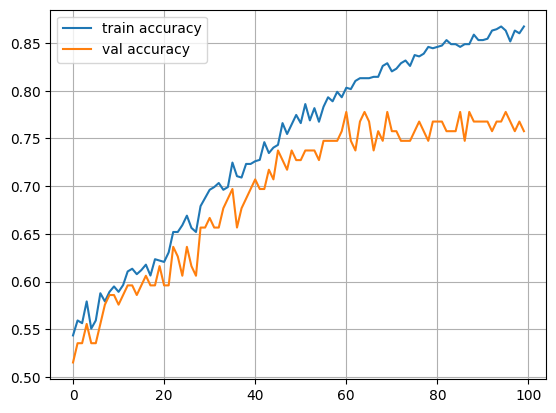

In [ ]:
train_log = []
val_log = []

for epoch in range(100):

    for x_batch,y_batch in iterate_minibatches(X_train, y_train, batchsize=32, shuffle=True):
        train(network, x_batch, y_batch)

    train_log.append(np.mean(predict(network, X_train) == y_train))
    val_log.append(np.mean(predict(network, X_val) == y_val))

    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [ ]:
y_pred = predict(network, X_test)
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=classes_list))

                    precision    recall  f1-score   support

     entertainment       0.58      0.37      0.45        19
         geography       0.76      0.76      0.76        17
            health       0.85      0.77      0.81        22
          politics       0.93      0.90      0.92        30
science/technology       0.74      0.94      0.83        51
            sports       0.90      0.72      0.80        25
            travel       0.78      0.80      0.79        40

          accuracy                           0.79       204
         macro avg       0.79      0.75      0.77       204
      weighted avg       0.79      0.79      0.79       204

